## Análisis Predictivo de Precios Inmobiliarios: Evaluación de Modelos de Regresión y Selección de Variables Clave

**Elegir y justificar un modelo de
regresión adecuado al problema y a las
evidencias analíticas.**

*Se eligió el modelo HuberRegressor por su robustez frente a valores atípicos en los precios inmobiliarios. Este modelo mejoró el rendimiento al reducir el MAE de 182,847 a 169,465, superando a la regresión lineal. Además, conserva la interpretabilidad y se adapta bien al problema de predicción de precios, considerando el preprocesamiento adecuado y la selección de variables relevantes.*

## Cargar bibiliotecas y funciones

**Cargar biblioteca**

In [ ]:
# Cargar bibliotecas necesarias para el análisis y modelado
import pandas as pd                 # Manipulación de datos
import numpy as np                  # Operaciones numéricas

# Herramientas de Scikit-learn para el modelo y evaluación
from sklearn.model_selection import train_test_split  # División en conjunto de entrenamiento y prueba
from sklearn.linear_model import LinearRegression, HuberRegressor  # Modelos de regresión
from sklearn import metrics                           # Métricas de evaluación
from sklearn.preprocessing import StandardScaler      # Estandarización de variables

# Estadísticas de forma
from scipy.stats import kurtosis, skew                # Cálculo de curtosis y asimetría

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns


**Función para calcular y graficar correlaciones**

In [ ]:
def correlacion(dataframe, grafica=True, matrix=True, tamaño =(6, 4)):
    '''Devuelve la matriz de correlación de un dataframe
    y sí grafica=True, muestra un mapa de calor de la matriz de correlación'''
    corr=dataframe.corr()
    if grafica==True:
      fig = plt.figure(figsize = tamaño)
      ax = sns.heatmap(corr,
                       vmin = -1,
                       vmax = 1,
                       center = 0,
                       cmap = "coolwarm",
                       annot = True,
                       fmt=".2f",
                       square = True)
      ax.set_xticklabels(ax.get_xticklabels(),
                         rotation = 45,
                         horizontalalignment ='right')
    if matrix==True:
      return corr

### Función para describir un DataFrame

In [ ]:
def describe_datos(df):
    """
    Genera un resumen detallado de un DataFrame.

    Parámetro:
    df (DataFrame): Conjunto de datos a analizar.

    Retorna:
    DataFrame con la siguiente información por columna:
    - Tipo de dato (dtypes)
    - Cantidad de valores nulos (null)
    - Número de valores únicos (nunique)
    - Lista de valores únicos (unique)
    """

    # Extraer los valores únicos de cada columna
    valores_unicos = [df[col].unique() for col in df.columns]

    # Crear un DataFrame con la descripción de los datos
    descripcion = pd.DataFrame({
        'Tipo de Dato': df.dtypes,
        'Valores Nulos': df.isna().sum(),
        'Valores Únicos': df.nunique(),
        'Valores Distintos': valores_unicos
    })

    return descripcion  # Retorna el DataFrame con el resumen


## Lectura de datos y breve exploración

In [ ]:
# Cargar el archivo CSV desde la ruta especificada
Ys = pd.read_csv(
    '/content/drive/MyDrive/M L & AI for the W A/y.csv',  # Ruta al archivo CSV
    index_col=[0],  # Usa la primera columna como índice (identificador único)
    sep=',',        # Especifica el delimitador de columnas (por defecto en CSV es una coma)
)

# Imprimir las dimensiones del DataFrame cargado
print("Dimensiones de Y:", Ys.shape)

# Mostrar las primeras 2 filas del DataFrame como vista preliminar
Ys.head(2)

Dimensiones de Y: (37368, 1)


,price
id_annonce,
35996577,355000.0
35811033,190000.0


 *En este caso, se esta trabajando con datos inmobiliarios, y la variable que te
   interesa predecir es el precio del inmueble (price)*.

In [ ]:
# Extraer la columna 'price' del DataFrame Ys y asignarla a una nueva variable 'y'
y = Ys['price']

**Cargar el archivo CSV para las variables independientes (X)**

In [ ]:
# Cargar el archivo CSV para las variables independientes (X)
X = pd.read_csv(
    '/content/drive/MyDrive/M L & AI for the W A/X.csv',  # Ruta al archivo CSV
    sep=',',                     # Delimitador de columnas (coma, predeterminado en CSV)
    index_col=[0],               # Usar la primera columna como índice (identificador único)
)

# Imprimir las dimensiones del DataFrame X
print("Dimensiones de X:", X.shape)

# Mostrar las primeras 2 filas del DataFrame X como vista preliminar
X.head(2)

Dimensiones de X: (37368, 26)


,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,energy_performance_category,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
id_annonce,,,,,,,,,,,,,,,,,,,,,
35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,NaN,...,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,D,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Resumen descriptivo de las variables**

In [ ]:
print("Resumen descriptivo de las variables del DataFrame:\n")
describe_datos(X)

Resumen descriptivo de las variables del DataFrame:



,Tipo de Dato,Valores Nulos,Valores Únicos,Valores Distintos
property_type,object,0,22,"[appartement, maison, propriété, divers, duple..."
approximate_latitude,float64,0,37368,"[43.64387987003234, 45.695756723197945, 47.966..."
approximate_longitude,float64,0,37368,"[7.117182951005137, 4.89560993095212, -1.22045..."
city,object,0,8643,"[villeneuve-loubet, venissieux, moutiers, cord..."
postal_code,int64,0,4726,"[6270, 69200, 35130, 44360, 69007, 91380, 9220..."
size,float64,512,4478,"[63.0, 90.0, 61.0, 142.0, 88.0, 92.0, 1758.0, ..."
floor,float64,27625,24,"[nan, 3.0, 5.0, 1.0, 2.0, 55.0, 6.0, 4.0, 8.0,..."
land_size,float64,21787,3721,"[nan, 370.0, 764.0, 25700.0, 392.0, 2600.0, 78..."
energy_performance_value,float64,18300,642,"[nan, 223.0, 217.0, 161.0, 193.0, 89.0, 220.0,..."
energy_performance_category,object,18300,7,"[nan, D, B, C, A, E, F, G]"


 __Eliminación de Columnas con Alta Cardinalidad o Valores Nulos__


In [ ]:
# Lista de columnas candidatas a eliminar (nombres reales y justificaciones)
col_borrar = [
    'energy_performance_category',  # 48.97% de nulos: Casi la mitad de los datos ausentes
    'ghg_value',                   # reconstruible desde 'ghg_value'
    'exposition',                   # 75.66% de nulos
    'city',                         # alta cardinalidad
    'postal_code',                  # redundante con latitud/longitud
    'energy_performance_value',     # Casi la mitad de los datos ausentes48.97% de nulos
    'ghg_category',                 # 50% nulos
    'land_size',                    # 58% nulos + muchos valores extremos
    'floor',                        # 74% nulos
    'last_floor',                   # variabilidad extremadamente baja (0.38%  <5% umbral )
    'upper_floors'                  # variabilidad extremadamente baja (0.024%  <5% umbral recomendado)
]

# Filtrar solo columnas que realmente existen en X
col_borrar_existentes = [col for col in col_borrar if col in X.columns]

# Eliminar columnas del DataFrame
X = X.drop(columns=col_borrar_existentes)

# Verificar resultado
X.info()



<class 'pandas.core.frame.DataFrame'>
Index: 37368 entries, 35996577 to 35748883
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          37368 non-null  object 
 1   approximate_latitude   37368 non-null  float64
 2   approximate_longitude  37368 non-null  float64
 3   size                   36856 non-null  float64
 4   nb_rooms               35802 non-null  float64
 5   nb_bedrooms            34635 non-null  float64
 6   nb_bathrooms           24095 non-null  float64
 7   nb_parking_places      37368 non-null  float64
 8   nb_boxes               37368 non-null  float64
 9   nb_photos              37368 non-null  float64
 10  has_a_balcony          37368 non-null  float64
 11  nb_terraces            37368 non-null  float64
 12  has_a_cellar           37368 non-null  float64
 13  has_a_garage           37368 non-null  float64
 14  has_air_conditioning   37368 non-null  float64
dt

**Variables candidatas para eliminar**

- **`city`** (`object`, 8.643 valores únicos)  
  - Redundante con `approximate_latitude` y `approximate_longitude`  
  - Alta cardinalidad → one-hot encoding ≈ miles de columnas

- **`postal_code`** (0% nulos, 4.726 únicos)  
  - Mismo problema de cardinalidad  
  - Redundante para análisis espaciales

- **`last_floor`, `upper_floors`**  
  - Variables binarias poco informativas (clases minoritarias <5%)  
  -  *Applied Predictive Modelin* (Kuhn & Johnson): variables con baja proporción pueden afectar el rendimiento del modelo


**Integración de Variables Predictoras y Objetivo**

In [ ]:
# Unir las variables predictoras (X) con la variable objetivo (y) en un solo DataFrame
# Esto es útil para análisis exploratorios y visualizaciones conjuntas
df = pd.concat([X, y], axis=1)  # axis=1 indica que se concatena por columnas

# Mostrar el número de filas y columnas del nuevo DataFrame
print(df.shape)

# Mostrar las primeras 5 filas del DataFrame combinado
df.head()

(37368, 16)


,property_type,approximate_latitude,approximate_longitude,size,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,price
id_annonce,,,,,,,,,,,,,,,,
35996577,appartement,43.643880,7.117183,63.0,3.0,2.0,NaN,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,355000.0
35811033,appartement,45.695757,4.895610,90.0,5.0,4.0,NaN,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,190000.0
35731841,maison,47.966791,-1.220451,61.0,2.0,1.0,NaN,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,39000.0
35886765,maison,47.289292,-1.878805,142.0,4.0,3.0,NaN,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,299000.0
35781137,appartement,45.718992,4.844234,88.0,4.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,478000.0


In [ ]:
df = pd.concat([X,y], axis=1)
print(df.shape)
df.head()

(37368, 16)


,property_type,approximate_latitude,approximate_longitude,size,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,price
id_annonce,,,,,,,,,,,,,,,,
35996577,appartement,43.643880,7.117183,63.0,3.0,2.0,NaN,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,355000.0
35811033,appartement,45.695757,4.895610,90.0,5.0,4.0,NaN,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,190000.0
35731841,maison,47.966791,-1.220451,61.0,2.0,1.0,NaN,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,39000.0
35886765,maison,47.289292,-1.878805,142.0,4.0,3.0,NaN,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,299000.0
35781137,appartement,45.718992,4.844234,88.0,4.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,478000.0


**Idetificación del tipo de variable de cada columna**


In [ ]:
df.dtypes

,0
property_type,object
approximate_latitude,float64
approximate_longitude,float64
size,float64
nb_rooms,float64
nb_bedrooms,float64
nb_bathrooms,float64
nb_parking_places,float64
nb_boxes,float64
nb_photos,float64


**Conversión de Variables Categóricas y Binarias**

In [ ]:
# Variables categóricas
categoricas = ['property_type']
df[categoricas] = df[categoricas].astype('object')

# Variables binarias a booleano
binarias = ['has_a_garage', 'has_a_balcony',
            'has_air_conditioning',
            'nb_parking_places', 'nb_boxes',
            'nb_terraces', 'has_a_cellar']
df[binarias] = df[binarias].astype('bool')

describe_datos(df)


,Tipo de Dato,Valores Nulos,Valores Únicos,Valores Distintos
property_type,object,0,22,"[appartement, maison, propriété, divers, duple..."
approximate_latitude,float64,0,37368,"[43.64387987003234, 45.695756723197945, 47.966..."
approximate_longitude,float64,0,37368,"[7.117182951005137, 4.89560993095212, -1.22045..."
size,float64,512,4478,"[63.0, 90.0, 61.0, 142.0, 88.0, 92.0, 1758.0, ..."
nb_rooms,float64,1566,44,"[3.0, 5.0, 2.0, 4.0, 6.0, 9.0, 12.0, 0.0, 16.0..."
nb_bedrooms,float64,2733,44,"[2.0, 4.0, 1.0, 3.0, 5.0, 6.0, 0.0, 8.0, 7.0, ..."
nb_bathrooms,float64,13273,4,"[nan, 1.0, 0.0, 2.0, 3.0]"
nb_parking_places,bool,0,2,"[False, True]"
nb_boxes,bool,0,2,"[False, True]"
nb_photos,float64,0,35,"[4.0, 8.0, 5.0, 1.0, 17.0, 6.0, 14.0, 11.0, 20..."


# Manejo de Valores Nulos

In [ ]:
print(df.shape)
describe_datos(df)

(37368, 16)


,Tipo de Dato,Valores Nulos,Valores Únicos,Valores Distintos
property_type,object,0,22,"[appartement, maison, propriété, divers, duple..."
approximate_latitude,float64,0,37368,"[43.64387987003234, 45.695756723197945, 47.966..."
approximate_longitude,float64,0,37368,"[7.117182951005137, 4.89560993095212, -1.22045..."
size,float64,512,4478,"[63.0, 90.0, 61.0, 142.0, 88.0, 92.0, 1758.0, ..."
nb_rooms,float64,1566,44,"[3.0, 5.0, 2.0, 4.0, 6.0, 9.0, 12.0, 0.0, 16.0..."
nb_bedrooms,float64,2733,44,"[2.0, 4.0, 1.0, 3.0, 5.0, 6.0, 0.0, 8.0, 7.0, ..."
nb_bathrooms,float64,13273,4,"[nan, 1.0, 0.0, 2.0, 3.0]"
nb_parking_places,bool,0,2,"[False, True]"
nb_boxes,bool,0,2,"[False, True]"
nb_photos,float64,0,35,"[4.0, 8.0, 5.0, 1.0, 17.0, 6.0, 14.0, 11.0, 20..."


**"No hay valores nulos en las variables categóricas"**



## One Hot Encoding

In [ ]:
df[categoricas].nunique()

,0
property_type,22


__Análisis de Pareto de la Variable property_type (99%)__

In [ ]:
# Configura el límite para el análisis (ej. 80% para Pareto clásico)
porcentaje_limite = 99

# Calcula frecuencia de cada categoría y su acumulado
pareto_df = (
    df['property_type']
    .value_counts()                         # Cuenta cuántas veces aparece cada tipo
    .to_frame(name='Frecuencia')           # Convierte a DataFrame
    .assign(
        Porcentaje_acumulado=lambda x:
            (x['Frecuencia'] / len(df) * 100).cumsum().round(2),  # % acumulado
        Limite=porcentaje_limite,                                  # Línea de referencia
        Principales_categorias=lambda x:
            x['Porcentaje_acumulado'] <= porcentaje_limite         # Marca las categorías clave
    )
    .sort_values('Porcentaje_acumulado')   # Ordena de menor a mayor acumulado
)

# Muestra la tabla con: frecuencias, % acumulado y categorías relevantes
pareto_df

,Frecuencia,Porcentaje_acumulado,Limite,Principales_categorias
property_type,,,,
appartement,15733,42.10,99,True
maison,15675,84.05,99,True
divers,2137,89.77,99,True
terrain,1534,93.87,99,True
villa,781,95.96,99,True
propriété,408,97.06,99,True
terrain à bâtir,298,97.85,99,True
duplex,220,98.44,99,True
viager,177,98.92,99,True


__*Selección y visualización de categorías principales mediante análisis de Pareto”*__



In [ ]:
def categorias_utiles_pareto(df_column, porcentaje):
    # Data Frame con datos necesarios
    frecuencia = df_column.value_counts()
    sum_acumulada = (df_column.value_counts() / len(df_column) * 100).cumsum()

    pareto_df = pd.DataFrame({
        'Frecuencia': frecuencia,
        'Porcentaje_acumulado': sum_acumulada,
        'Limite': porcentaje
    })

    # Obtención de categorías útiles
    pareto_df['Principales_categorias'] = np.where(
        pareto_df['Porcentaje_acumulado'] <= porcentaje, 100, 0
    )
    principales_categorias = pareto_df[pareto_df['Principales_categorias'] == 100].index.tolist()

    # Imprimir resultados
    print(f'\nCategorías totales: {pareto_df.shape[0]}')
    print(f'Categorías que representan el {porcentaje}%: {len(principales_categorias)}')
    print(f'Principales categorías: {principales_categorias}\n')

    # Configuración del gráfico
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Gráfico de barras (Frecuencia)
    ax1.bar(pareto_df.index.astype(str),
            pareto_df['Frecuencia'],
            color='#2c5c8a',
            edgecolor='black')
    ax1.set_ylabel("Frecuencia", fontsize=12)
    ax1.tick_params(axis='y', labelsize=10)

    # Eje secundario (Porcentaje acumulado)
    ax2 = ax1.twinx()
    ax2.plot(pareto_df.index.astype(str),
             pareto_df['Porcentaje_acumulado'],
             marker='o',
             ms=6,
             color="#ff7f0e",
             linewidth=2,
             label='% Acumulado')
    ax2.axhline(porcentaje, color="gray", linestyle='--', label='Límite')
    ax2.set_ylim(0, 105)
    ax2.set_ylabel("% Acumulado", fontsize=12, rotation=270, labelpad=20)
    ax2.tick_params(axis='y', labelsize=10)

    # Ajustes de etiquetas
    ax1.set_xticklabels(pareto_df.index.astype(str),
                       rotation=55,
                       ha='right',
                       fontsize=10)
    plt.subplots_adjust(bottom=0.3)

    # Leyenda
    lines = [
        plt.Line2D([], [], color='#2c5c8a', marker='s', linestyle='None', markersize=10),
        plt.Line2D([], [], color='#ff7f0e', marker='o', linewidth=2),
        plt.Line2D([], [], color='gray', linestyle='--')
    ]
    ax1.legend(lines, ['Frecuencia', '% Acumulado', 'Límite'],
              loc='upper left',
              bbox_to_anchor=(1.05, 1),
              fontsize=10)

    # Título y grid
    plt.title(f'Análisis de Pareto - {df_column.name}', fontsize=14, pad=20)
    ax1.grid(axis='y', alpha=0.3, linestyle='--')

    plt.show()

    return principales_categorias


Categorías totales: 22
Categorías que representan el 99%: 9
Principales categorías: ['appartement', 'maison', 'divers', 'terrain', 'villa', 'propriété', 'terrain à bâtir', 'duplex', 'viager']



<ipython-input-279-a45c8bbb19cd>:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(pareto_df.index.astype(str),


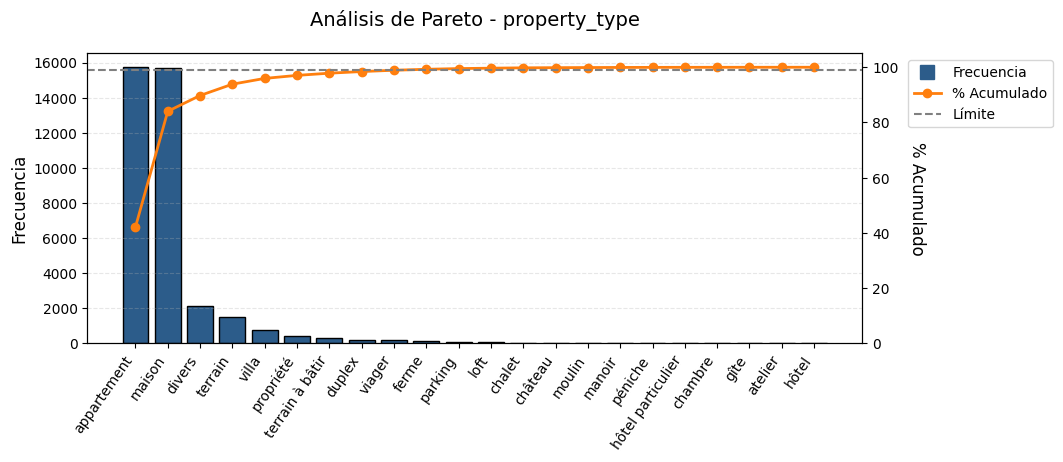

In [ ]:
cat_reason = categorias_utiles_pareto(df['property_type'], 99)

In [ ]:
describe_datos(df[categoricas])

,Tipo de Dato,Valores Nulos,Valores Únicos,Valores Distintos
property_type,object,0,22,"[appartement, maison, propriété, divers, duple..."


__**Reducción de cardinalidad de property_type con regla de Pareto (99%)**__


In [ ]:
# Paso 1: Extraer principales categorías (donde Pareto fue True)
cat_property_type = pareto_df[pareto_df['Principales_categorias']].index.tolist()

# Paso 2: Reemplazar en el DataFrame original los valores no principales por NaN
df['property_type'] = np.where(df['property_type'].isin(cat_property_type),
                               df['property_type'], np.nan)
describe_datos(df[categoricas])

,Tipo de Dato,Valores Nulos,Valores Únicos,Valores Distintos
property_type,object,405,9,"[appartement, maison, propriété, divers, duple..."


- __**¿Qué hicimos?**__
  - Aplicamos una reducción de cardinalidad a la variable property_type usando la regla de Pareto (99%). Esto significa que:

  - Conservaste solo las categorías más frecuentes que juntas representan el 99% de los casos.

  - Reemplazamos las categorías poco frecuentes con NaN.



### Codificación One-Hot de Variables Categóricas


*Se aplica `pd.get_dummies()` para transformar la variable categórica `property_type` en variables boleanas (False/True), creando una columna por cada categoría conservada tras el filtrado de Pareto. Esto permite usar la variable en modelos que requieren entradas numéricas.¨*



In [ ]:
df_cat_ohe = pd.get_dummies(df[categoricas])
print(df_cat_ohe.shape)
df_cat_ohe.head()

(37368, 9)


,property_type_appartement,property_type_divers,property_type_duplex,property_type_maison,property_type_propriété,property_type_terrain,property_type_terrain à bâtir,property_type_viager,property_type_villa
id_annonce,,,,,,,,,
35996577,True,False,False,False,False,False,False,False,False
35811033,True,False,False,False,False,False,False,False,False
35731841,False,False,False,True,False,False,False,False,False
35886765,False,False,False,True,False,False,False,False,False
35781137,True,False,False,False,False,False,False,False,False


In [ ]:
df.columns

Index(['approximate_longitude', 'nb_rooms', 'nb_bathrooms',
       'nb_parking_places', 'nb_boxes', 'nb_photos', 'has_a_balcony',
       'nb_terraces', 'has_a_cellar', 'has_a_garage', 'has_air_conditioning',
       'property_type_appartement', 'property_type_divers',
       'property_type_duplex', 'property_type_maison',
       'property_type_propriété', 'property_type_terrain',
       'property_type_terrain à bâtir', 'property_type_viager',
       'property_type_villa', 'price', 'aux'],
      dtype='object')

In [ ]:
df.shape, df_cat_ohe.shape

((37368, 16), (37368, 9))

In [ ]:
df = df.drop(columns=categoricas)
df = pd.concat([df, df_cat_ohe], axis=1)
df.shape

(37368, 24)

In [ ]:
#Llevar la etiqueta hasta la ultima posición

df = df[[c for c in df if c != 'price'] + ['price']]
print(df.shape)
df.info()

(37368, 24)
<class 'pandas.core.frame.DataFrame'>
Index: 37368 entries, 35996577 to 35748883
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   approximate_latitude           37368 non-null  float64
 1   approximate_longitude          37368 non-null  float64
 2   size                           36856 non-null  float64
 3   nb_rooms                       35802 non-null  float64
 4   nb_bedrooms                    34635 non-null  float64
 5   nb_bathrooms                   24095 non-null  float64
 6   nb_parking_places              37368 non-null  bool   
 7   nb_boxes                       37368 non-null  bool   
 8   nb_photos                      37368 non-null  float64
 9   has_a_balcony                  37368 non-null  bool   
 10  nb_terraces                    37368 non-null  bool   
 11  has_a_cellar                   37368 non-null  bool   
 12  has_a_garage                 

In [ ]:
df.columns

Index(['approximate_latitude', 'approximate_longitude', 'size', 'nb_rooms',
       'nb_bedrooms', 'nb_bathrooms', 'nb_parking_places', 'nb_boxes',
       'nb_photos', 'has_a_balcony', 'nb_terraces', 'has_a_cellar',
       'has_a_garage', 'has_air_conditioning', 'property_type_appartement',
       'property_type_divers', 'property_type_duplex', 'property_type_maison',
       'property_type_propriété', 'property_type_terrain',
       'property_type_terrain à bâtir', 'property_type_viager',
       'property_type_villa', 'price'],
      dtype='object')

In [ ]:
# Identificar y convertir a tipo booleano las columnas binarias del DataFrame
boleanas = []  # Lista para almacenar nombres de columnas con solo dos valores únicos

for col in df.columns:
    if df[col].nunique() == 2:  # Si la columna tiene exactamente 2 valores distintos
        boleanas.append(col)    # Se considera candidata a tipo booleano

# Convertir las columnas identificadas al tipo de dato booleano
df[boleanas] = df[boleanas].astype('bool')

# Exploración de las variables numéricas

__**Paso 1: Selección de Columnas Numéricas**__


In [ ]:
numericas = list(df.select_dtypes(include=['int64', 'float64']).columns)
numericas

['approximate_latitude',
 'approximate_longitude',
 'size',
 'nb_rooms',
 'nb_bedrooms',
 'nb_bathrooms',
 'nb_photos',
 'price']

- **En este paso.**
  - *seleccionamos únicamente las columnas que contienen datos numéricos (específicamente de tipo int64 y float64)*

__**Paso 2: Cantidad de Nulos por Variable Numérica**__



In [ ]:
# Cantidad de nulos por variable numérica
nulos_numericas = df[numericas].isnull().sum()
print(nulos_numericas)

approximate_latitude         0
approximate_longitude        0
size                       512
nb_rooms                  1566
nb_bedrooms               2733
nb_bathrooms             13273
nb_photos                    0
price                        0
dtype: int64


- __**En este paso**__
  - Calculamos la cantidad de valores nulos (missing values) para cada una de las columnas numéricas seleccionadas en el paso anterior.
  - Esto es útil para evaluar la calidad de los datos y decidir si es necesario aplicar alguna técnica de imputación o eliminación

__**Paso 3: Imputar Columnas con la Mediana**__


In [ ]:
# Imputar valores faltantes con la mediana en columnas numéricas seleccionadas
cols_mediana = ['size', 'nb_rooms', 'nb_bedrooms', 'nb_bathrooms']  # Columnas con posibles valores nulos

for col in cols_mediana:
    # Reemplazar valores faltantes (NaN) por la mediana de cada columna
    df[col] = df[col].fillna(df[col].median())

In [ ]:
# Mostrar la cantidad de valores nulos por variable numérica
nulos_numericas = df[numericas].isnull().sum()  # Cuenta los NaN en cada columna numérica
print(nulos_numericas)  # Imprime el número de nulos por variable

approximate_latitude     0
approximate_longitude    0
size                     0
nb_rooms                 0
nb_bedrooms              0
nb_bathrooms             0
nb_photos                0
price                    0
dtype: int64


__**Paso 4: Visualización de relaciones entre variables numéricas**__


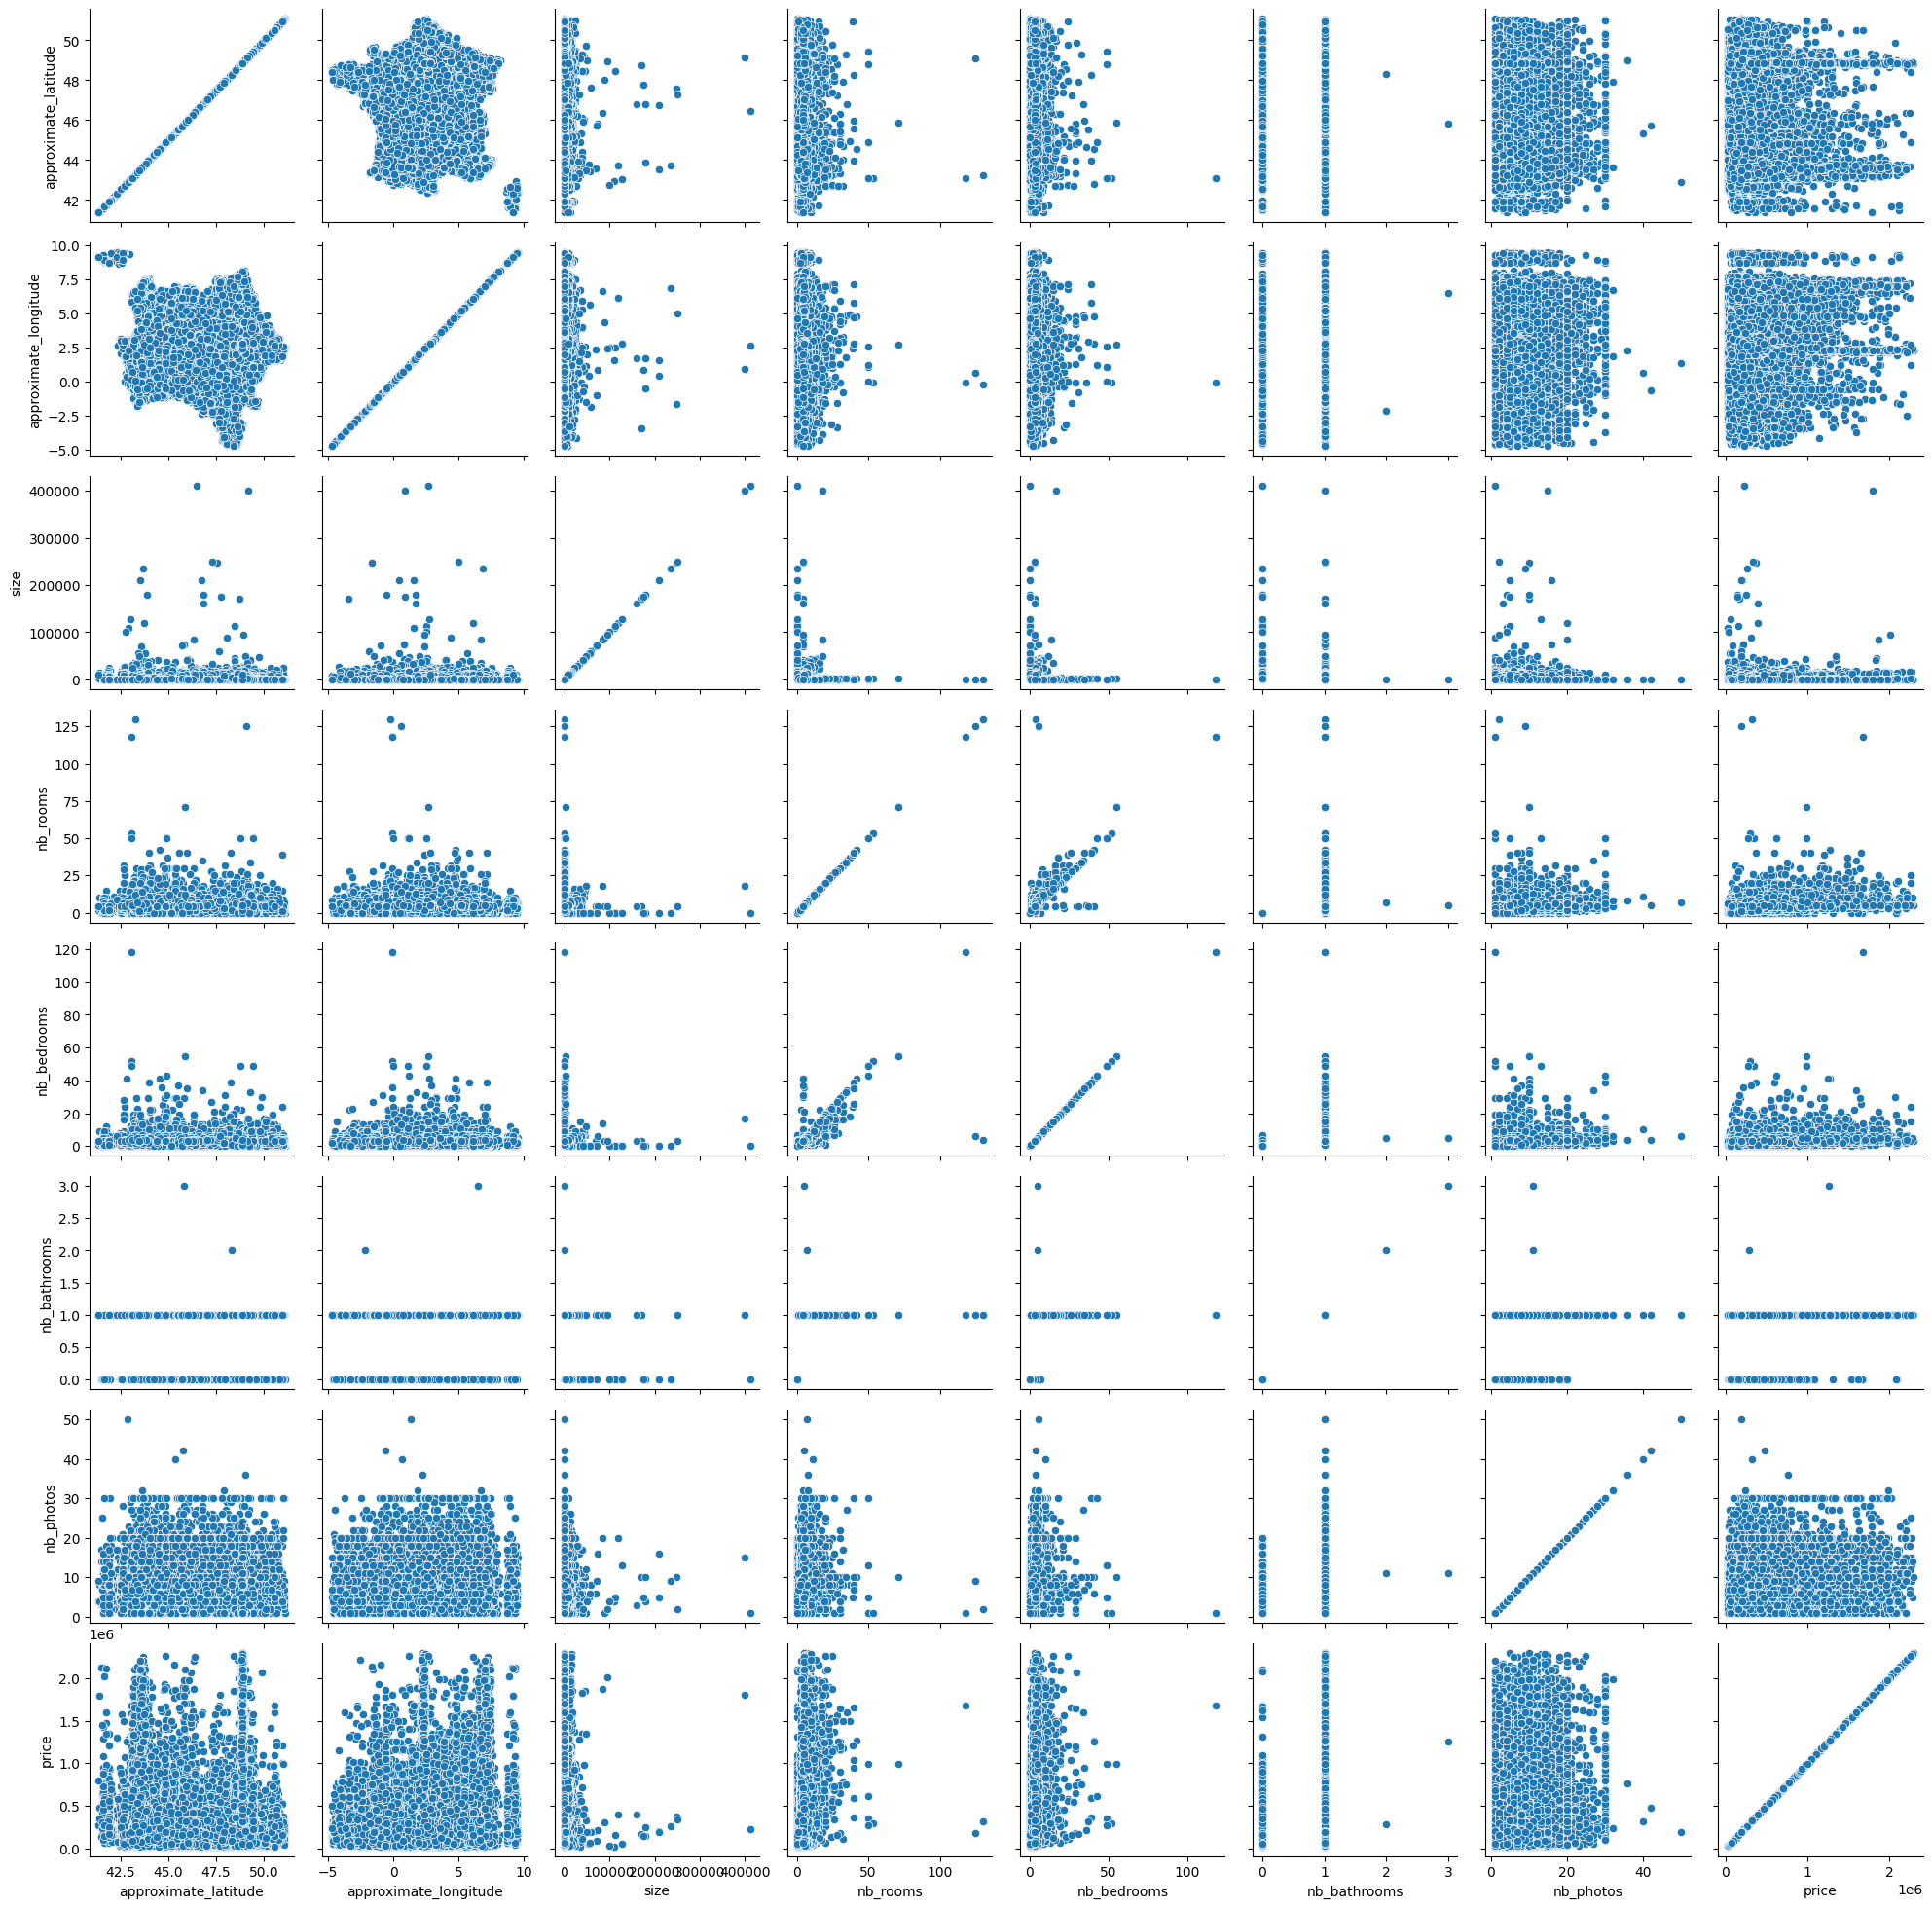

In [ ]:
g = sns.PairGrid(df[numericas])
g.map(sns.scatterplot)

__**Paso 5: Correlación con el precio (price)**__


In [ ]:
# Calcular la correlación entre las variables numéricas y la variable objetivo 'price'
corr_y = df[numericas].corr()['price']  # Extrae la columna de correlaciones con 'price'
corr_y  # Muestra las correlaciones

,price
approximate_latitude,0.034801
approximate_longitude,0.095404
size,0.034754
nb_rooms,0.303781
nb_bedrooms,0.288266
nb_bathrooms,0.172911
nb_photos,0.211963
price,1.000000


**Interpretación:**
- Una correlación más alta indica una relación más fuerte con el precio.

  - Por ejemplo, el número de habitaciones (nb_rooms) tiene la correlación más alta (0.30), lo que sugiere que los inmuebles con más habitaciones tienden a tener precios más altos.

  - En cambio, la size (tamaño) o las coordenadas geográficas tienen correlación casi nula.



__**Paso 6: Identificar variables no relevantes para el precio**__

In [ ]:
# Identificar variables numéricas con baja correlación respecto al precio
no_relevantes = corr_y.loc[corr_y.abs() < 0.05].index.to_list()  # Selecciona variables con correlación absoluta < 0.05
no_relevantes  # Muestra la lista de variables consideradas poco relevantes

['approximate_latitude', 'size']

**Interpretación**:

Estas variables tienen correlaciones tan pequeñas que probablemente no aportan información útil para predecir el precio. Podrían ser candidatas para eliminar en una etapa de selección de variables o análisis más enfocado

**Paso 7: Correlación entre características numéricas**



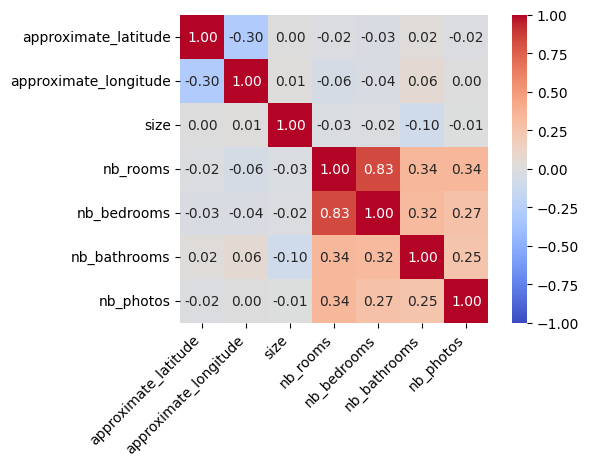

In [ ]:
# correlacion de las características numéricas en el conjunto X
corr_matrix = correlacion(df[numericas[:7]])

**Hallazgos Principales**:
- 1. Correlaciones Fuertes (> 0.7):
  - nb_rooms y nb_bedrooms: 0.83
  → A mayor número de habitaciones, más dormitorios (relación esperada).
- 2. Correlaciones Moderadas (0.3 - 0.7):
  - nb_rooms y nb_bathrooms: 0.34
  nb_bedrooms y nb_bathrooms: 0.32
  → Las propiedades con más habitaciones/dormitorios suelen tener más baños.
- 3. Correlaciones Débiles (< 0.3):

 -  Variables geográficas (latitude, longitude) vs. características físicas:
  ≈ -0.30 a 0.06 → La ubicación no influye significativamente en el tamaño o número de habitaciones.

- 4. Correlaciones Negativas:
  - approximate_latitude vs approximate_longitude: -0.30
  → Sugiere un patrón geográfico inverso en la distribución de propiedades.

**Paso 8: Identificación de variables redundantes**



In [ ]:
#Identificar variables redundantes

# Triangulo superior de la matriz de correlación en números absolutos
celda_sobre_diagonal_ppal = np.triu(np.ones_like(corr_matrix), 1).astype(bool)
triangulo_sup = corr_matrix.where(celda_sobre_diagonal_ppal).abs()


# Encontrar las columnas donde la correlación es 1
redundantes = [column for column in triangulo_sup.columns
          if any(triangulo_sup[column] >= .7)]
redundantes

['nb_bedrooms']

Esta correlación indica que el número de dormitorios está altamente explicado por el número de habitaciones

**Paso 9: Eliminar variables redundantes y no relevantes**



In [ ]:
df = df.drop(redundantes + no_relevantes, axis=1)

Variables Eliminadas:

nb_bedrooms: Redundante por alta correlación con nb_rooms (0.83).

approximate_latitude y size: Correlación insignificante con price (0.03)

In [ ]:
df.columns

Index(['approximate_longitude', 'nb_rooms', 'nb_bathrooms',
       'nb_parking_places', 'nb_boxes', 'nb_photos', 'has_a_balcony',
       'nb_terraces', 'has_a_cellar', 'has_a_garage', 'has_air_conditioning',
       'property_type_appartement', 'property_type_divers',
       'property_type_duplex', 'property_type_maison',
       'property_type_propriété', 'property_type_terrain',
       'property_type_terrain à bâtir', 'property_type_viager',
       'property_type_villa', 'price'],
      dtype='object')

In [ ]:
df.shape

(37368, 21)

# Exploración de la variable respuesta


**Visualizar la distribución del precio de las propiedades**



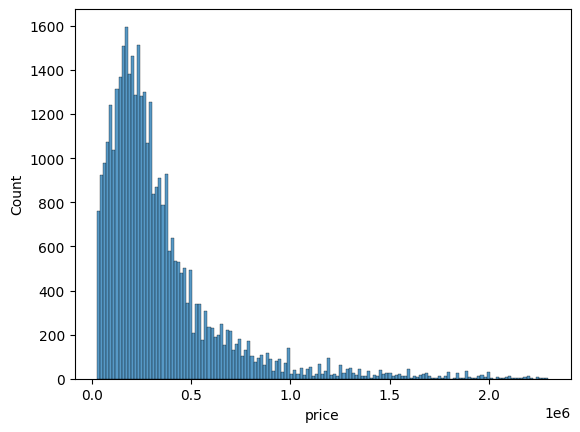

In [ ]:
sns.histplot(df['price'])
plt.show()

**Distribución sesgada:** La mayoría de propiedades están concentradas en el rango bajo (0.0 a 0.5 unidades), con cola hacia valores mayores.

Posibles Valores extremos (>1.5 unidades) podrían requerir tratamiento.

In [ ]:
df['price'].quantile(.975)

np.float64(1275000.0)

**Intervalos de confianza:**
- En estadística, el percentil 97.5 se usa junto con el 2.5 para crear un intervalo de confianza del 95%. Por ejemplo, en una distribución normal:

- El 95% de los datos están entre los percentiles 2.5 y 97.5.

- Esto ayuda a identificar el rango central de los datos y detectar valores extremos.

- Detección de outliers:
Si un valor supera el percentil 97.5, se considera un valor atípico superior en muchos análisis.


Esto significa que:

El 97.5% de los inmuebles tienen un precio menor o igual a 1.275.000.

Solo el 2.5% de los inmuebles tienen un precio superior a 1.275.000, lo que los convierte en posibles valores atípicos (outliers)

Identificación de Inmuebles con Precios Atípicamente Altos (Outliers Superiores)


In [ ]:
df['aux'] = (df['price'] > df['price'].quantile(.975)).astype(int)
print(df['aux'].value_counts())


aux
0    36436
1      932
Name: count, dtype: int64


0 → Hay 36.436 inmuebles con precio normal o bajo (no considerados extremos).

1 → Hay 932 inmuebles con precio muy alto, lo que puede indicar que son outliers (valores atípicos superiores).



**"Distribución de Precios Segmentada por Outliers (Top 2.5%)"**



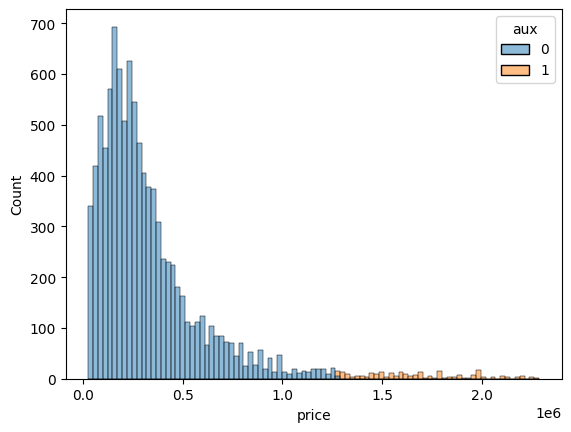

In [ ]:
figsize=(12, 4)
muestra = df.sample(10000)
sns.histplot(x='price', hue='aux', data=muestra )
plt.show()

**Análisis de Distribución de Precios de Propiedades**

__Explicación Breve__
El gráfico muestra la distribución de precios diferenciando dos grupos:
- **`aux=0` (azul)**: 97.5% de los datos (precios dentro del rango esperado)  
- **`aux=1` (naranja)**: 2.5% de outliers (propiedades más caras)

---

__Hallazgos Clave__

 __Relación General__
- **Tendencia positiva clara**:
  - Aumento de habitaciones → Mayor precio (relación esperada)
  - _Excepciones notables en outliers_

__Concentración Principal__

Rango donde se ubica el 95% de las propiedades:
Habitaciones: 0 - 50  
Precio: 0.5 - 1.5 millones (udm)

In [ ]:
df.shape

(37368, 22)

# Comparación Regresión lineal, Regresión robusta

__**Separar las etiquetas del conjunto de datos (Regresión Lineal)**__

In [ ]:
y = df['price']
X = df.drop(['price', 'aux'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    random_state=8)

# ¿Cómo son los conjuntos de entrenamiento y prueba?
print("TRAINING SET")
print("X: ", X_train.shape)
print("y: ", y_train.shape)

print("TEST SET")
print("X: ", X_test.shape)
print("y: ", y_test.shape)

TRAINING SET
X:  (28026, 20)
y:  (28026,)
TEST SET
X:  (9342, 20)
y:  (9342,)


## Regresión Lineal

Entrenamiento del modelo y evaluación con Error Medio Absoluto (MAE)

In [ ]:
lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)

error_medio_absoluto = np.mean(np.absolute(y_test - y_pred ))
error_medio_absoluto

np.float64(182847.3290439189)

In [ ]:
 # Entrenar un modelo de regresión lineal con los datos de entrenamiento
lr = LinearRegression().fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = lr.predict(X_test)

# Calcular el Error Medio Absoluto (MAE)
error_medio_absoluto = np.mean(np.absolute(y_test - y_pred))

# Mostrar el resultado del MAE
print("Error Medio Absoluto (MAE):", error_medio_absoluto)


Error Medio Absoluto (MAE): 182847.3290439189


**Explicación breve:**

Este bloque entrena un modelo de regresión lineal y evalúa qué tan lejos están, en promedio, las predicciones (y_pred) de los valores reales (y_test). El MAE mide ese error promedio en unidades monetarias (ej. pesos, dólares).

(MAE): 182847.3290439189
significa que, en promedio, el modelo se equivoca por esa cantidad al predecir el precio de una propiedad.

 Cálculo de los errores de predicción individuales


In [ ]:
# Calculamos los errores como la diferencia entre el valor real y el valor predicho
errores = (y_test - y_pred)

# Número total de errores (uno por observación en el conjunto de prueba)
len(errores)

9342

- __**Esto nos da dos tipos de errores**__:

   - Cuando la predicción fue más alta que el valor real
     - y_pred > y_test → entonces error < 0.

  - Cuando la predicción fue más baja que el valor real
     - y_pred < y_test → entonces error > 0.

In [ ]:
#una de las hipotesis de la regresión es que los errores son
#independientes  entre sí, teniendo una distribución normal

print(f'kurtosis: {kurtosis(errores)}')

kurtosis: 9.528033507270326


- __**La curtosis mide qué tan “afilada” o “plana” es la distribución de los errores en comparación con una distribución normal**__:

  - Si kurtosis ≈ 3: distribución normal (mesocúrtica).

  - Si kurtosis < 3: distribución plana (platicúrtica).

  - Si kurtosis > 3: distribución afilada (leptocúrtica).


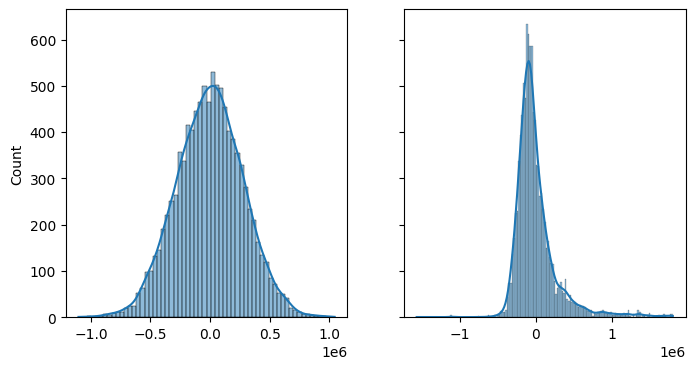

In [ ]:
# Comparación de la distribución teórica(normal) y empirica de los errores

media = np.mean(errores)
des_est = np.std(errores)
errores_teoricos = np.random.normal(media, des_est, 10000)
muestra_errores = np.random.choice(errores, 10000)

fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey='all')
for dat, subplot in zip((errores_teoricos, muestra_errores), ax.flatten()):
    sns.histplot(x=dat, ax=subplot, kde=True )

plt.show()

- __**Explicación breve**__:
   - En la izquierda vemos la distribución teórica de los errores si fueran normales (campana simétrica). A la derecha, la distribución empírica de los errores reales.

 - La distribución real está más picuda en el centro y con colas más largas a la derecha, lo cual indica una asimetría y mayor curtosis (pico más alto y más extremos)

## Regresión Robusta

Implementación de Regresión Huber para Modelado Robusto

In [ ]:
# Importar el modelo HuberRegressor y el módulo de métricas
from sklearn.linear_model import HuberRegressor
from sklearn import metrics

# Instanciar el modelo Huber con hiperparámetros definidos
# epsilon=1 controla la sensibilidad a outliers
# alpha=0 significa que no hay regularización
# max_iter=1000 permite hasta 1000 iteraciones
hr = HuberRegressor(
    epsilon=1,
    max_iter=1000,
    alpha=0,
    warm_start=False,
    fit_intercept=True,
    tol=1e-05
)

# Entrenar el modelo con los datos de entrenamiento
hr = hr.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred_hr = hr.predict(X_test)

# Calcular y mostrar el Error Medio Absoluto (MAE)
# Este valor mide el promedio de los errores absolutos entre las predicciones y los valores reales
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_hr))

MAE: 169465.37129180587


**Explicación Breve**:
El código entrena un modelo de HuberRegressor, diseñado para reducir el impacto de outliers en datos. Con un MAE (Error Absoluto Medio) de ≈ 169465.3713

Se utiliza el MAE (Mean Absolute Error) como métrica de evaluación. En este caso:

MAE ≈ 169465.37113
Esto indica que, en promedio, el modelo se equivoca en aproximadamente 169465 mil unidades en sus predicciones.

**Cálculo de errores y curtosis**

In [ ]:
# Calcular los errores de predicción del modelo Huber
# (diferencia entre valores reales y predichos)
errores_hr = y_test - y_pred_hr

# Calcular y mostrar la curtosis de los errores
# La curtosis indica qué tan "picuda" o aplanada es la distribución de los errores
print(f'kurtosis: {kurtosis(errores_hr)}')

kurtosis: 10.365419249381155


Se calcula el vector de errores como la diferencia entre los valores reales y los predichos. Luego, se mide la curtosis, que indica qué tan "picuda" o concentrada está la distribución de los errores. Un valor superior a 3 sugiere colas más pesadas que la normal (más outliers).

Curtosis obtenida: 10.367 → distribución con colas más pesadas que una normal estándar.

**Distribución de errores de predicción**

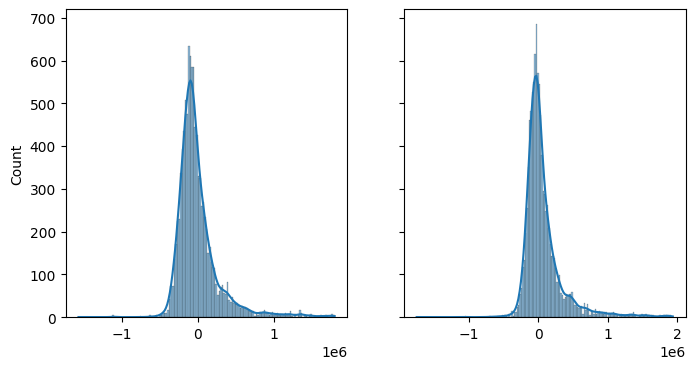

In [ ]:
# Comparación de la distribución empirica de los errores de regresión lineal y regresión de hubber

fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey='all')
for dat, subplot in zip((muestra_errores,
                         np.random.choice(errores_hr,10000)), ax.flatten()):
    sns.histplot(x=dat, ax=subplot, kde=True )

plt.show()

El gráfico muestra los histogramas de los errores de predicción (y_test - y_pred) con ajuste de densidad (curva KDE) para dos modelos. En ambos casos, los errores se concentran fuertemente alrededor de cero, pero presentan colas largas, indicando la presencia de outliers o valores extremos.

**Importancia de las variables en el modelo HuberRegressor**

In [ ]:
# Crear un DataFrame con los coeficientes del modelo Huber
# Cada fila representa una variable explicativa y su coeficiente asociado
coeficientes_hr = pd.DataFrame({
    'coef': hr.coef_,
    'variable': list(X.columns)
})

# Ordenar los coeficientes de menor a mayor y reiniciar el índice
coeficientes_hr.sort_values('coef').reset_index(drop=True)

,coef,variable
0,-154167.493854,property_type_viager
1,-60814.962073,property_type_maison
2,-51616.924442,property_type_divers
3,-6662.543888,nb_boxes
4,-5557.075982,has_a_cellar
5,1976.200287,nb_photos
6,3083.652387,approximate_longitude
7,8650.742114,has_a_balcony
8,10711.462842,nb_parking_places
9,28656.912331,property_type_duplex


Se extraen y ordenan los coeficientes estimados del modelo para interpretar la influencia de cada variable sobre la variable objetivo. Los coeficientes positivos indican una relación directa (a mayor valor de la variable, mayor el precio predicho), mientras que los negativos indican una relación inversa.

Por ejemplo:

property_type_viager tiene el coeficiente más negativo → su presencia reduce significativamente el precio.

**Estandarización de las variables predictoras**

In [ ]:
# Crear una copia del DataFrame original para no modificarlo directamente
X_estandarizados = X.copy()

# Seleccionar las columnas que se van a estandarizar
columnas = X.columns

# Instanciar un escalador estándar (media 0, desviación estándar 1)
scaler = StandardScaler()

# Aplicar la transformación a las columnas seleccionadas
X_estandarizados[columnas] = scaler.fit_transform(X[columnas])

In [ ]:
X_estandarizados.describe()

,approximate_longitude,nb_rooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,property_type_appartement,property_type_divers,property_type_duplex,property_type_maison,property_type_propriété,property_type_terrain,property_type_terrain à bâtir,property_type_viager,property_type_villa
count,3.736800e+04,3.736800e+04,3.736800e+04,3.736800e+04,3.736800e+04,3.736800e+04,3.736800e+04,3.736800e+04,3.736800e+04,3.736800e+04,3.736800e+04,3.736800e+04,3.736800e+04,3.736800e+04,3.736800e+04,3.736800e+04,3.736800e+04,3.736800e+04,3.736800e+04,3.736800e+04
mean,6.236834e-17,2.129651e-17,1.351948e-16,-6.750232e-17,3.270535e-17,6.160775e-17,-5.324127e-18,-1.342441e-16,-8.233382e-17,3.061373e-17,4.335360e-17,6.883335e-17,-1.977533e-17,-1.863444e-17,2.738122e-17,8.375992e-17,5.133979e-17,-2.471916e-17,8.366485e-18,-1.782632e-17
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-2.831175e+00,-1.447964e+00,-4.299164e+00,-6.445160e-01,-4.680438e-01,-1.502159e+00,-4.172499e-01,-6.696478e-01,-5.002258e-01,-2.386143e-01,-2.037170e-01,-8.527610e-01,-2.462860e-01,-7.695620e-02,-8.500490e-01,-1.050665e-01,-2.069022e-01,-8.965961e-02,-6.898707e-02,-1.461040e-01
25%,-5.864683e-01,-4.222810e-01,2.315811e-01,-6.445160e-01,-4.680438e-01,-6.412183e-01,-4.172499e-01,-6.696478e-01,-5.002258e-01,-2.386143e-01,-2.037170e-01,-8.527610e-01,-2.462860e-01,-7.695620e-02,-8.500490e-01,-1.050665e-01,-2.069022e-01,-8.965961e-02,-6.898707e-02,-1.461040e-01
50%,-9.175670e-02,-8.038655e-02,2.315811e-01,-6.445160e-01,-4.680438e-01,4.486944e-03,-4.172499e-01,-6.696478e-01,-5.002258e-01,-2.386143e-01,-2.037170e-01,-8.527610e-01,-2.462860e-01,-7.695620e-02,-8.500490e-01,-1.050665e-01,-2.069022e-01,-8.965961e-02,-6.898707e-02,-1.461040e-01
75%,7.720991e-01,2.615079e-01,2.315811e-01,1.551552e+00,-4.680438e-01,4.349571e-01,-4.172499e-01,1.493322e+00,-5.002258e-01,-2.386143e-01,-2.037170e-01,1.172662e+00,-2.462860e-01,-7.695620e-02,1.176403e+00,-1.050665e-01,-2.069022e-01,-8.965961e-02,-6.898707e-02,-1.461040e-01
max,2.650768e+00,4.299831e+01,9.293072e+00,1.551552e+00,2.136552e+00,9.044361e+00,2.396645e+00,1.493322e+00,1.999097e+00,4.190864e+00,4.908771e+00,1.172662e+00,4.060320e+00,1.299440e+01,1.176403e+00,9.517785e+00,4.833202e+00,1.115329e+01,1.449547e+01,6.844439e+00


**Estandarización de Variables con StandardScaler**

La estandarización transforma las variables numéricas para que tengan media 0 y desviación estándar 1, utilizando `StandardScaler`.

- **Mediana ≈ 0**: Indica que los datos están centrados; la mitad está por debajo y la otra por encima de cero.
- **Desviación estándar = 1**: La mayoría de los valores están a una distancia promedio de 1 unidad respecto a la media.
- **Utilidad**: Evita que variables con escalas mayores dominen el modelo, asegurando que todas tengan igual peso numérico en el aprendizaje.

Este proceso mejora el rendimiento y equidad de muchos algoritmos de aprendizaje automático.


**División del conjunto de datos en entrenamiento y prueba**

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba (75% - 25%)
# shuffle=True mezcla aleatoriamente los datos antes de dividir
# random_state=261 asegura que la división sea reproducible (misma aleatoriedad cada vez)
X_train, X_test, y_train, y_test = train_test_split(
    X_estandarizados,  # Variables independientes estandarizadas
    y,                 # Variable dependiente (precio)
    test_size=0.25,    # 25% para prueba, 75% para entrenamiento
    shuffle=True,
    random_state=261
)

**Configuración y Entrenamiento del Modelo HuberRegressor**



In [ ]:
# Instanciar el modelo HuberRegressor con parámetros personalizados
hr_st = HuberRegressor(
    epsilon=1,         # Controla la tolerancia a valores atípicos (más alto = más robusto)
    max_iter=1000,     # Número máximo de iteraciones
    alpha=0,           # Regularización (0 = sin penalización)
    warm_start=False,  # No reutiliza solución anterior
    fit_intercept=True,# Ajusta el intercepto (ordenada al origen)
    tol=1e-05          # Tolerancia para criterio de parada
)

# Entrenar el modelo robusto con los datos estandarizados
hr_st = hr_st.fit(X_train, y_train)

Los coeficientes representan el impacto de cada variable en el precio de las propiedades (en unidades monetarias). Valores positivos indican un aumento en el precio, mientras que los negativos sugieren una reducción.



In [ ]:
# Crear una Serie con los coeficientes del modelo Huber entrenado sobre variables estandarizadas,
# usando como índice los nombres de las columnas originales
coeficientes_hr_st = pd.Series(hr_st.coef_, index=columnas)

# Ordenar los coeficientes de menor a mayor y convertirlos en un DataFrame para una mejor visualización
coef_estand = pd.DataFrame(coeficientes_hr_st.sort_values(), columns=['coef'])

# Mostrar los coeficientes ordenados
coef_estand

,coef
property_type_maison,-27264.840993
property_type_divers,-11830.174933
property_type_viager,-10671.085579
nb_boxes,-2052.173080
has_a_cellar,-25.849885
has_a_balcony,2235.968541
property_type_terrain à bâtir,2575.647143
property_type_duplex,3218.776971
nb_parking_places,4558.836019
has_a_garage,5746.307805


**Coeficientes Negativos: ¿Qué Significan?**  

En regresión, un **coeficiente negativo** indica que, *manteniendo otras variables constantes*, esa característica **reduce el precio**.  

---

### **Ejemplos Clave**  
1. **Variables categóricas (*property_type*):**  
   - `property_type_maison` (-27,264 USD):  
     Propiedades *maison* valen **27k USD menos** vs. la categoría base (ej: *appartement*).  
   - `divers` (-11,830 USD) y `viager` (-10,671 USD): Misma lógica.  

2. **Variables numéricas:**  
   - `nb_boxes` (-2,052 USD): Cada plaza de garaje adicional **reduce el precio 2k USD**.  
     - *Posible razón*: Costos de mantenimiento no valorados o correlación con ubicaciones menos urbanas.  

---

**Conclusiones Clave**  

1. **Variables clave en precio:**  
   - *Más habitaciones* (`nb_rooms`) y *apartamentos* (`property_type_appartement`) → **precios altos**.  
   -  *Casas* (`maison`) y *viager* → **precios bajos**.  

2. **Efecto de comodidades:**  
   -  Valorizan: Terraza, garaje, aire acondicionado.  
   -  Reducen: Más plazas de garaje (`nb_boxes`) → *¿Costos ocultos?*.  

3. ** Factores contextuales:**  
   -  Ubicación geográfica (`longitude`) → Impacto significativo.  
   -  Más fotos (`nb_photos`) → Relación con precios altos (*¿Percepción de calidad?*).  